In [108]:
import pm4py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

In [109]:
if __name__ == "__main__":
    log_2012 = pm4py.read_xes('BPI_Challenge_2012.xes.gz')

parsing log, completed traces :: 100%|██████████| 13087/13087 [00:09<00:00, 1315.08it/s]


In [110]:
if __name__ == "__main__":
    dataframe_2012 = pm4py.convert_to_dataframe(log_2012)
    dataframe_2012.to_csv('dataframe_2012.csv')

In [111]:
dataframe_2012 = pd.read_csv('clean_BPI_2012.csv')

c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


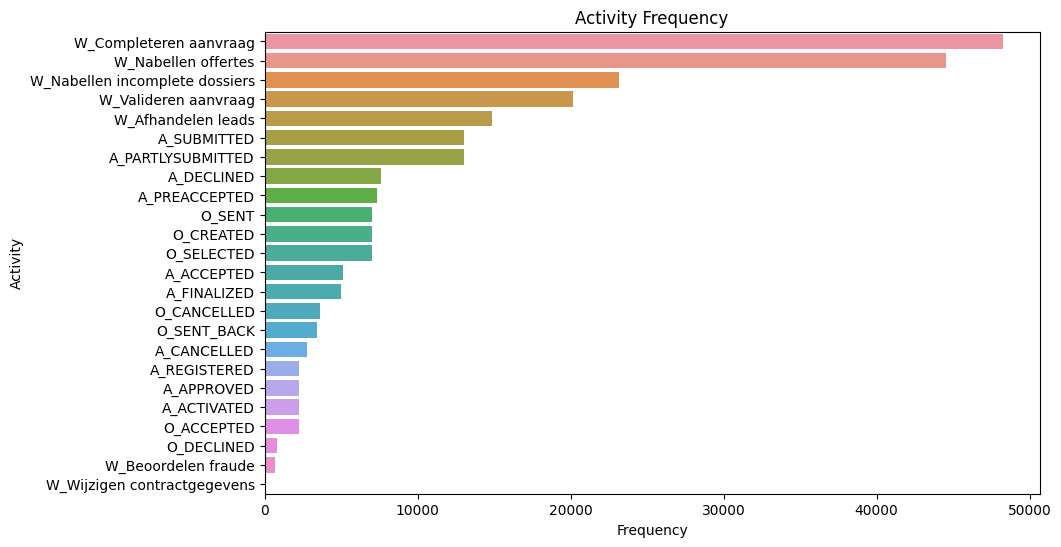

In [112]:
# Assuming 'concept:name' column contains the activity names
activity_counts = dataframe_2012['concept:name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.values, y=activity_counts.index)
plt.xlabel('Frequency')
plt.ylabel('Activity')
plt.title('Activity Frequency')
plt.show()

C:\Users\20193501\AppData\Local\Temp\ipykernel_10528\1111879368.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'min' instead.
  case_durations = dataframe_2012.groupby('case:concept:name')['time:timestamp'].agg([min, max])
C:\Users\20193501\AppData\Local\Temp\ipykernel_10528\1111879368.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  case_durations = dataframe_2012.groupby('case:concept:name')['time:timestamp'].agg([min, max])
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

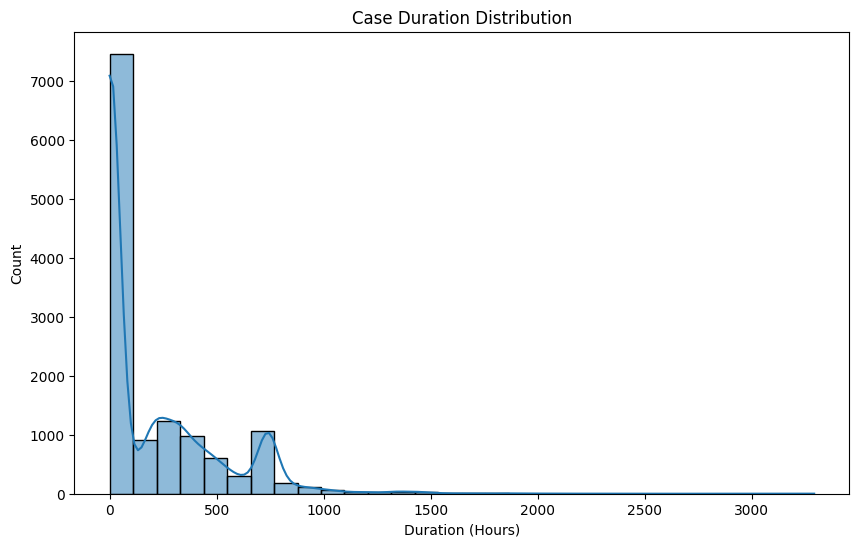

In [113]:
# Assuming 'time:timestamp' is the timestamp and 'case:concept:name' is the case ID
dataframe_2012['time:timestamp'] = pd.to_datetime(dataframe_2012['time:timestamp'])
case_durations = dataframe_2012.groupby('case:concept:name')['time:timestamp'].agg([min, max])
case_durations['duration'] = (case_durations['max'] - case_durations['min']).dt.total_seconds() / 3600  # Duration in hours

plt.figure(figsize=(10, 6))
sns.histplot(case_durations['duration'], bins=30, kde=True)
plt.xlabel('Duration (Hours)')
plt.ylabel('Count')
plt.title('Case Duration Distribution')
plt.show()


c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\20193501\AppData\Local\miniconda3\MiniConda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


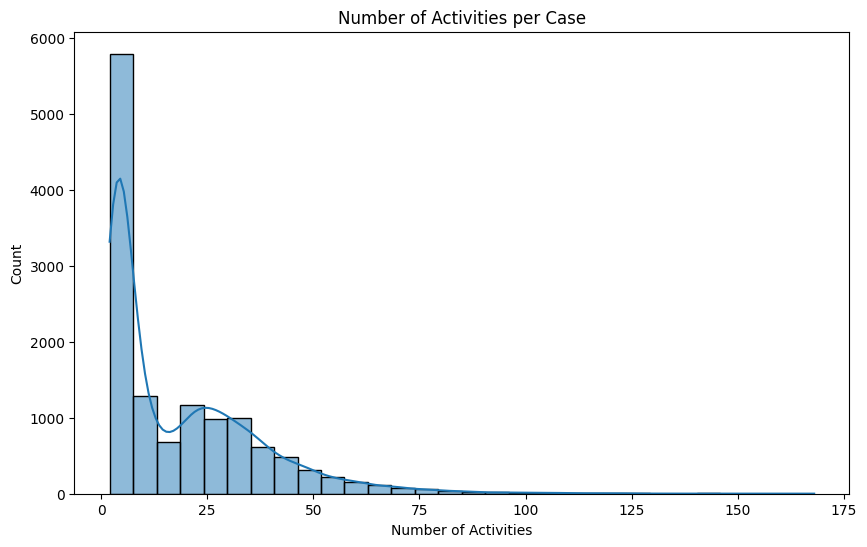

In [114]:
activities_per_case = dataframe_2012.groupby('case:concept:name').size()

plt.figure(figsize=(10, 6))
sns.histplot(activities_per_case, bins=30, kde=True)
plt.xlabel('Number of Activities')
plt.ylabel('Count')
plt.title('Number of Activities per Case')
plt.show()


In [115]:
dataframe_2012

,Unnamed: 0,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,timestamp_difference
0,0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,01:10:2011 00:38:44.546000,173688,20000,NaN
1,1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:00.334000
2,2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:53.026000
3,3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:00.969000
4,26,112,COMPLETE,A_SUBMITTED,2011-10-01 08:08:58.256,01:10:2011 08:08:58.256000,173691,5000,0 days 07:29:19.381000
...,...,...,...,...,...,...,...,...,...
243482,231114,11339,COMPLETE,A_APPROVED,2012-03-14 15:31:28.859,13:02:2012 15:50:41.425000,208901,11000,0 days 00:19:08.004000
243483,231115,11339,COMPLETE,A_ACTIVATED,2012-03-14 15:31:28.859,13:02:2012 15:50:41.425000,208901,11000,0 days 00:00:00
243484,231116,11339,COMPLETE,O_ACCEPTED,2012-03-14 15:31:28.859,13:02:2012 15:50:41.425000,208901,11000,0 days 00:00:00
243485,231117,11339,COMPLETE,A_REGISTERED,2012-03-14 15:31:28.859,13:02:2012 15:50:41.425000,208901,11000,0 days 00:00:00


In [116]:
dataframe_2012['concept:name'].value_counts()

concept:name
W_Completeren aanvraag            48240
W_Nabellen offertes               44543
W_Nabellen incomplete dossiers    23144
W_Valideren aanvraag              20148
W_Afhandelen leads                14882
A_SUBMITTED                       13065
A_PARTLYSUBMITTED                 13058
A_DECLINED                         7617
A_PREACCEPTED                      7349
O_SENT                             7011
O_CREATED                          7011
O_SELECTED                         7011
A_ACCEPTED                         5100
A_FINALIZED                        5000
O_CANCELLED                        3642
O_SENT_BACK                        3445
A_CANCELLED                        2796
A_REGISTERED                       2239
A_APPROVED                         2238
A_ACTIVATED                        2238
O_ACCEPTED                         2237
O_DECLINED                          802
W_Beoordelen fraude                 660
W_Wijzigen contractgegevens          11
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

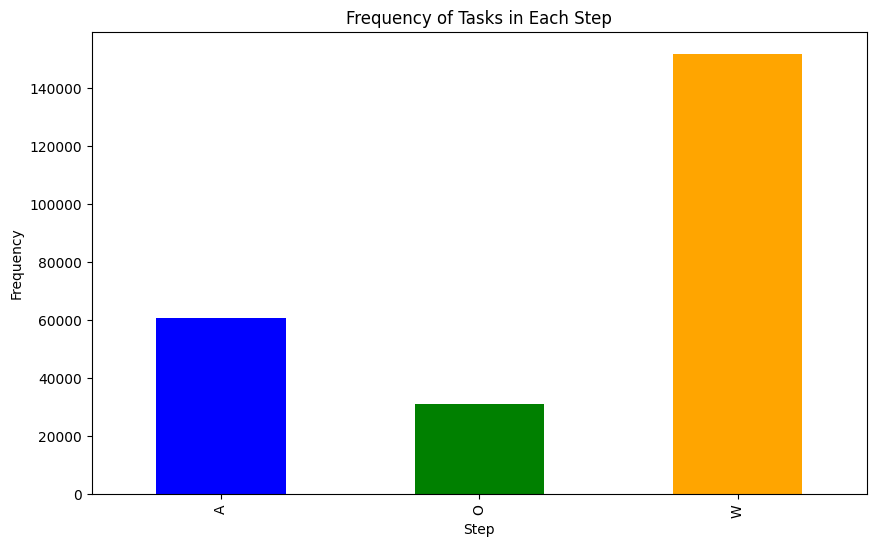

In [117]:
# Extract prefixes ('W_', 'O_', 'A_')
dataframe_2012['prefix'] = dataframe_2012['concept:name'].str.split('_').str[0]

# Create separate columns for each step
dataframe_2012['W'] = dataframe_2012['prefix'].apply(lambda x: x == 'W')
dataframe_2012['O'] = dataframe_2012['prefix'].apply(lambda x: x == 'O')
dataframe_2012['A'] = dataframe_2012['prefix'].apply(lambda x: x == 'A')

# Plot the frequency of tasks chosen at each step
fig, ax = plt.subplots(figsize=(10, 6))

dataframe_2012.groupby('prefix').size().plot(kind='bar', color=['blue', 'green', 'orange'], ax=ax)
ax.set_title('Frequency of Tasks in Each Step')
ax.set_xlabel('Step')
ax.set_ylabel('Frequency')

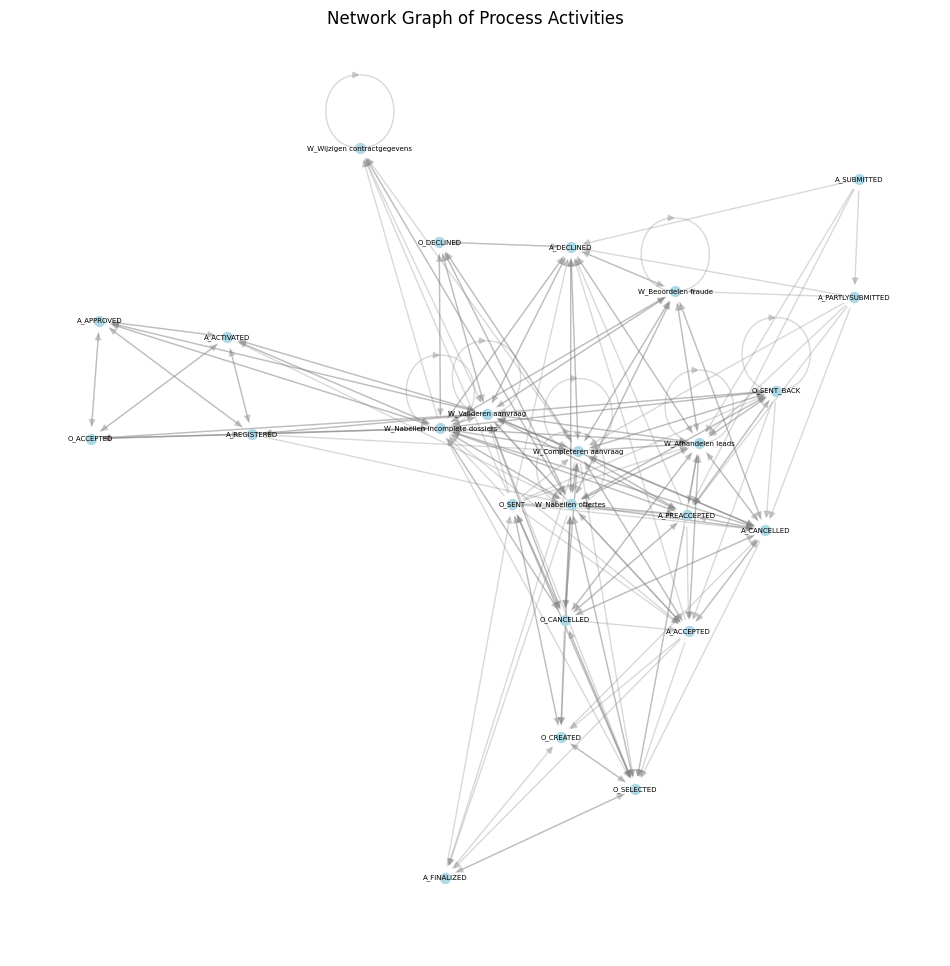

In [118]:
# Create a directed graph
G = nx.DiGraph()

# Add edges for transitions between activities for each case
# Here, we'll track the last activity to create a sequence within each case
last_activity = {}

for index, row in dataframe_2012.iterrows():
    case_id = row['case:concept:name']
    activity = row['concept:name']
    
    # Check if the current case had a previous activity
    if case_id in last_activity:
        # Add edge from last activity to current activity for the same case
        G.add_edge(last_activity[case_id], activity)
    
    # Update the last activity for the current case
    last_activity[case_id] = activity

# Use a spring layout to visualize the graph, attempting to reflect some hierarchy or sequence
pos = nx.spring_layout(G, seed=42)  # Seed for reproducible layout

# Drawing the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightblue")
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")

plt.title("Network Graph of Process Activities")
plt.axis("off")  # Turn off the axis
plt.show()

In [119]:
dataframe_2012['time:timestamp'] = pd.to_datetime(dataframe_2012['time:timestamp'])

# Generate event sequence numbers within each case
dataframe_2012.sort_values(by=['case:concept:name', 'time:timestamp'], inplace=True)
dataframe_2012['event_seq'] = dataframe_2012.groupby('case:concept:name').cumcount() + 1

dataframe_2012


,Unnamed: 0,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,timestamp_difference,prefix,W,O,A,event_seq
0,0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,01:10:2011 00:38:44.546000,173688,20000,NaN,A,False,False,True,1
1,1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:00.334000,A,False,False,True,2
2,2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:53.026000,A,False,False,True,3
3,3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:00.969000,W,True,False,False,4
79968,5,10862,COMPLETE,A_ACCEPTED,2011-10-01 11:42:43.308,01:10:2011 00:38:44.546000,173688,20000,0 days 00:55:49.075000,A,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45384,262195,112,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:00.624000,A,False,False,True,2
45385,262196,112,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:43.864000,W,True,False,False,3
191543,262197,11169,START,W_Afhandelen leads,2012-03-01 09:26:46.736,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:59.056000,W,True,False,False,4
191544,262198,11169,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:50.382000,A,False,False,True,5


In [120]:
# Calculate the difference between the current event's timestamp and the next one
#dataframe_2012['time_to_next_event'] = dataframe_2012.groupby('case:concept:name')['time:timestamp'].transform(lambda x: x.diff().shift(-1))

# Convert the 'time_to_next_event' from timedelta to seconds (or any other numeric representation you prefer)
#dataframe_2012['time_to_next_event_seconds'] = dataframe_2012['time_to_next_event'].dt.total_seconds().fillna(0)

# Step 2: Compute the mean duration for each 'concept:name'
#average_durations_per_concept = dataframe_2012.groupby('concept:name')['time_to_next_event_seconds'].mean().reset_index(name='mean_duration_seconds')

# Step 3: Merge this mean duration back into the original dataframe to use as a prediction
#dataframe_2012 = pd.merge(dataframe_2012, average_durations_per_concept, how='left', on='concept:name')

# Rename the 'mean_duration_seconds' column to something like 'predicted_duration_seconds'
#dataframe_2012.rename(columns={'mean_duration_seconds': 'predicted_time_to_next_event_seconds'}, inplace=True)

# Optionally, convert the 'predicted_time_to_next_event_seconds' back to a timedelta for readability or further datetime operations
#dataframe_2012['predicted_time_to_next_event'] = pd.to_timedelta(dataframe_2012['predicted_time_to_next_event_seconds'], unit='s')


In [121]:

#dataframe_2012 = dataframe_2012.drop(columns=['predicted_time_to_next_event_seconds', 'time_to_next_event_seconds'])


In [122]:

# Subtract the timestamp of the first event in each case from all events in that case
dataframe_2012['elapsed_time_from_start'] = dataframe_2012.groupby('case:concept:name')['time:timestamp'].transform(lambda x: x - x.min())

# Calculate the average elapsed time from the start for each 'event_seq'
predicted_start_time = dataframe_2012.groupby('event_seq')['elapsed_time_from_start'].mean().reset_index(name='predicted_start_time')

# Merge this average elapsed time back into the original DataFrame to use as a predicted start time
dataframe_2012 = pd.merge(dataframe_2012, predicted_start_time, on='event_seq', how='left')






In [123]:
average_elapsed_time

,event_seq,average_elapsed_time
0,1,0 days 00:00:00
1,2,0 days 00:00:00.614308692
2,3,0 days 00:00:48.874779895
3,4,0 days 02:48:33.680641012
4,5,0 days 07:29:38.975707744
...,...,...
163,164,61 days 13:19:56.674000
164,165,61 days 20:05:45.885000
165,166,61 days 20:08:15.812000
166,167,61 days 20:08:15.812000


In [124]:
# Step 1: Shift the 'concept:name' within each group to get the next step
#dataframe_2012['next_step'] = dataframe_2012.groupby('case:concept:name')['concept:name'].shift(-1)

# Step 2: For each 'concept:name', calculate the most common next step
# We'll group by 'concept:name' and then use value_counts on 'next_step' to find the most common follow-up step
#most_common_next_steps = dataframe_2012.groupby('concept:name')['next_step'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(n

# Merge the most common next step back into the original DataFrame
#dataframe_2012 = pd.merge(dataframe_2012, most_common_next_steps, how='left', on='concept:name')

# Rename the merged column to 'predicted_next_step'
#dataframe_2012.rename(columns={'most_common_next_step': 'predicted_next_step'}, inplace=True)

In [125]:
# Calculate the most common concept:name for each event_seq
most_common_concepts_by_seq = dataframe_2012.groupby('event_seq')['concept:name'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='predicted_step')
# Merge the most common concept:name for each event_seq back into the original DataFrame
dataframe_2012 = pd.merge(dataframe_2012, most_common_concepts_by_seq, on='event_seq', how='left')

In [126]:
dataframe_2012

,Unnamed: 0,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,timestamp_difference,prefix,W,O,A,event_seq,elapsed_time_from_start,predicted_start_time,predicted_step
0,0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546,01:10:2011 00:38:44.546000,173688,20000,NaN,A,False,False,True,1,0 days 00:00:00,0 days 00:00:00,A_SUBMITTED
1,1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:00.334000,A,False,False,True,2,0 days 00:00:00.334000,0 days 00:00:00.614308692,A_PARTLYSUBMITTED
2,2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:53.026000,A,False,False,True,3,0 days 00:00:53.360000,0 days 00:00:48.874779895,A_PREACCEPTED
3,3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875,01:10:2011 00:38:44.546000,173688,20000,0 days 00:00:00.969000,W,True,False,False,4,0 days 00:00:54.329000,0 days 02:48:33.680641012,W_Completeren aanvraag
4,5,10862,COMPLETE,A_ACCEPTED,2011-10-01 11:42:43.308,01:10:2011 00:38:44.546000,173688,20000,0 days 00:55:49.075000,A,False,False,True,5,0 days 11:03:58.762000,0 days 07:29:38.975707744,W_Completeren aanvraag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243482,262195,112,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 23:51:17.423,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:00.624000,A,False,False,True,2,0 days 00:00:00.624000,0 days 00:00:00.614308692,A_PARTLYSUBMITTED
243483,262196,112,SCHEDULE,W_Afhandelen leads,2012-02-29 23:52:01.287,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:43.864000,W,True,False,False,3,0 days 00:00:44.488000,0 days 00:00:48.874779895,A_PREACCEPTED
243484,262197,11169,START,W_Afhandelen leads,2012-03-01 09:26:46.736,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:59.056000,W,True,False,False,4,0 days 09:35:29.937000,0 days 02:48:33.680641012,W_Completeren aanvraag
243485,262198,11169,COMPLETE,A_DECLINED,2012-03-01 09:27:37.118,29:02:2012 23:51:16.799000,214376,15000,0 days 00:00:50.382000,A,False,False,True,5,0 days 09:36:20.319000,0 days 07:29:38.975707744,W_Completeren aanvraag
